In [162]:
from scipy.constants import c
import numpy as np
from numpy.lib import recfunctions as rec
from astropy.io          import fits
from astropy.coordinates import SkyCoord, Angle, search_around_sky
from astropy             import units as u
from astropy import cosmology
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from redmapper import RunZScan
from redmapper import Configuration
from matplotlib import pyplot as plt
import pandas as pd
import math
from tqdm.notebook import tqdm
import pickle
import time
import scipy.optimize as optimize
from iminuit import Minuit

import SciServer
from SciServer import Authentication, LoginPortal, Config, CasJobs, SkyQuery, SciDrive, SkyServer, Files, Jobs

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib
from matplotlib import cm
from PIL import Image

import img2pdf
import glob
import re
import cv2

In [124]:
import healpy as hp

In [99]:
#import master list
redmap = fits.getdata("/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_master_table.fit")
redmap=pd.DataFrame.from_records(redmap.tolist(), columns=redmap.dtype.names)

In [150]:
#Nside to feed to healpy
redmap.nside

0    32
Name: nside, dtype: int64

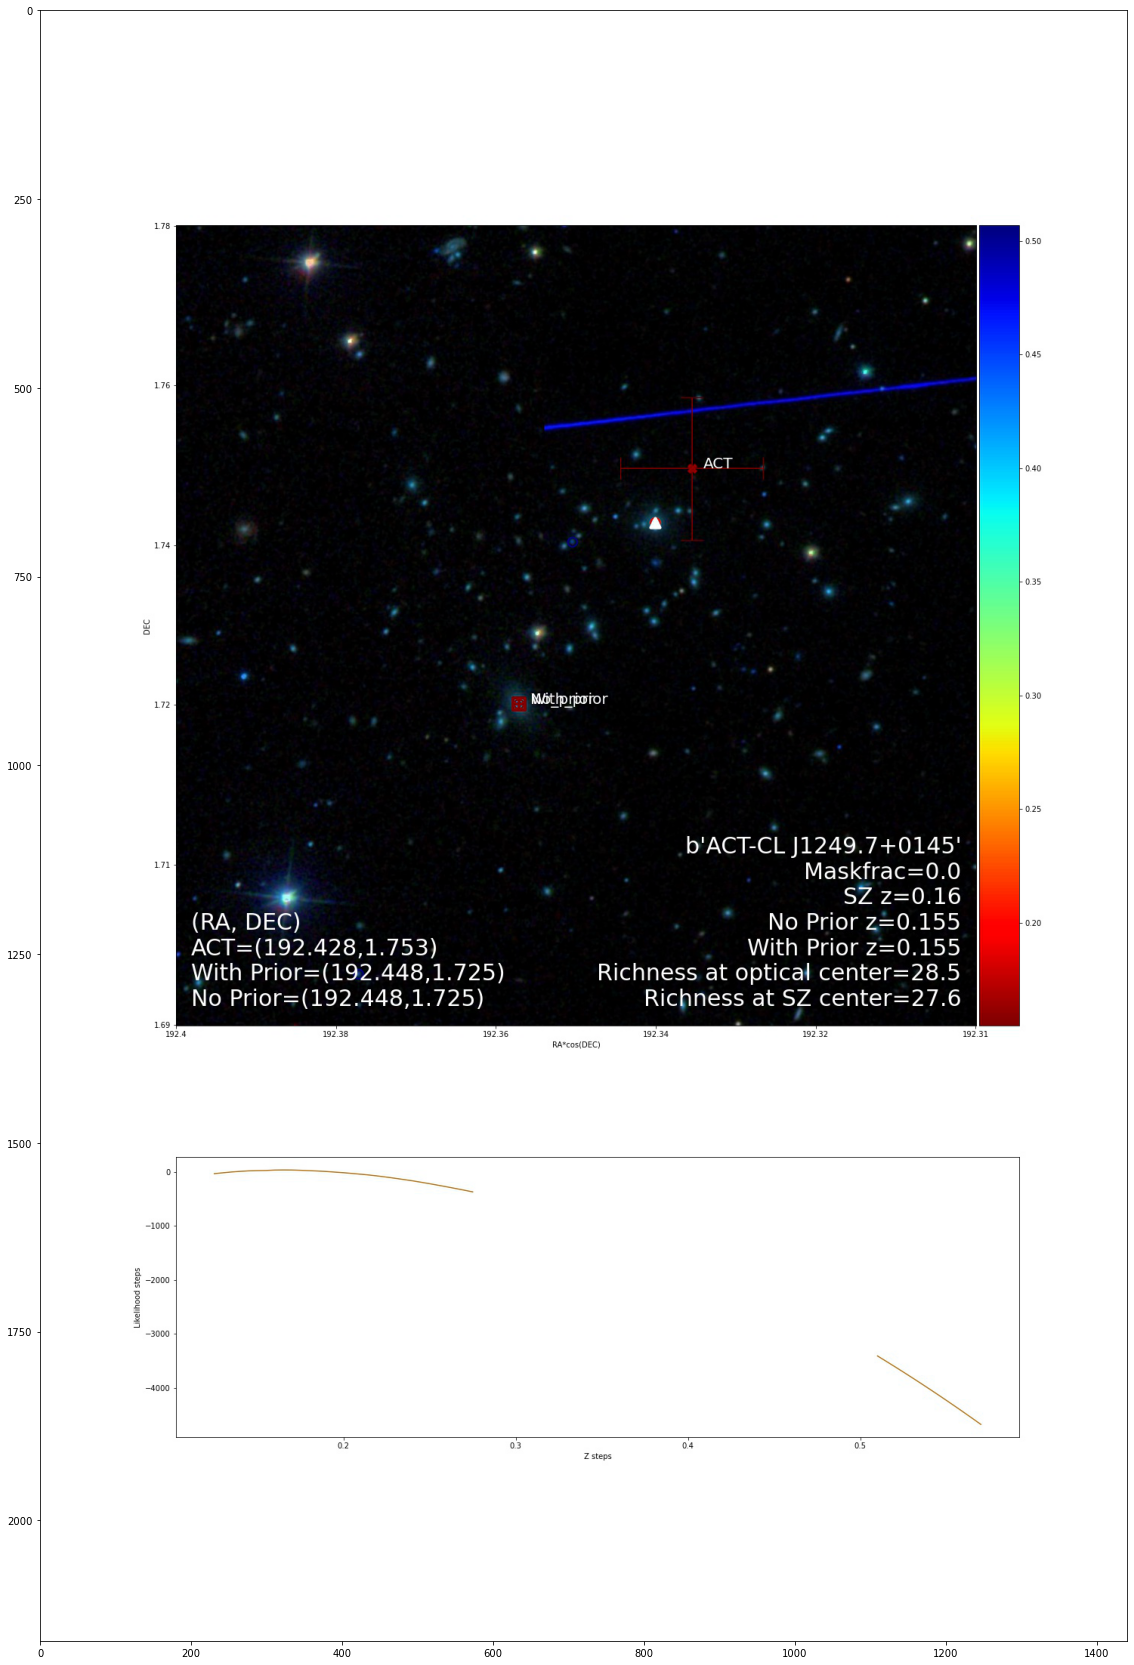

In [166]:
#This is the first cluster I'm looking at

image = cv2.imread('./skyimages/all_sorted_by_deltatheta30.jpg')
height, width, depth = image.shape
dpi = matplotlib.rcParams['figure.dpi']

figsize = width / float(dpi), height / float(dpi)

plt.figure(figsize=figsize)

plt.imshow(image)
plt.show()

In [151]:
#Searching for the RA,DEC of the nearby spectroscopic galaxy (white triangle)
ra,dec=192.43193, 1.7464802

In [152]:
#Which pixel should this galaxy be in?
hp.ang2pix(32,ra,dec,lonlat=True)

5892

In [153]:
#load that pixel
pixel = fits.getdata("/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_0005892.fit")
pixel=pd.DataFrame.from_records(np.array(pixel).tolist(), columns=pixel.dtype.names)

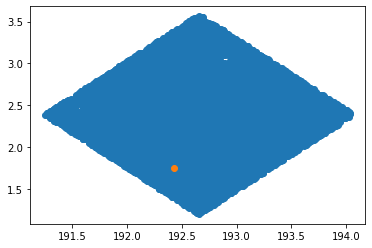

In [154]:
#Check that our ra, dec is inside this pixel. Blue dots are other galaxies, orange is our galaxy
plt.scatter(pixel.ra, pixel.dec)
plt.scatter(ra, dec)

In [155]:
#Find our galaxy in this list
np.where(np.isclose(pixel.ra,ra) & np.isclose(pixel.dec,dec))

(array([], dtype=int64),)

In [167]:
#Not there!

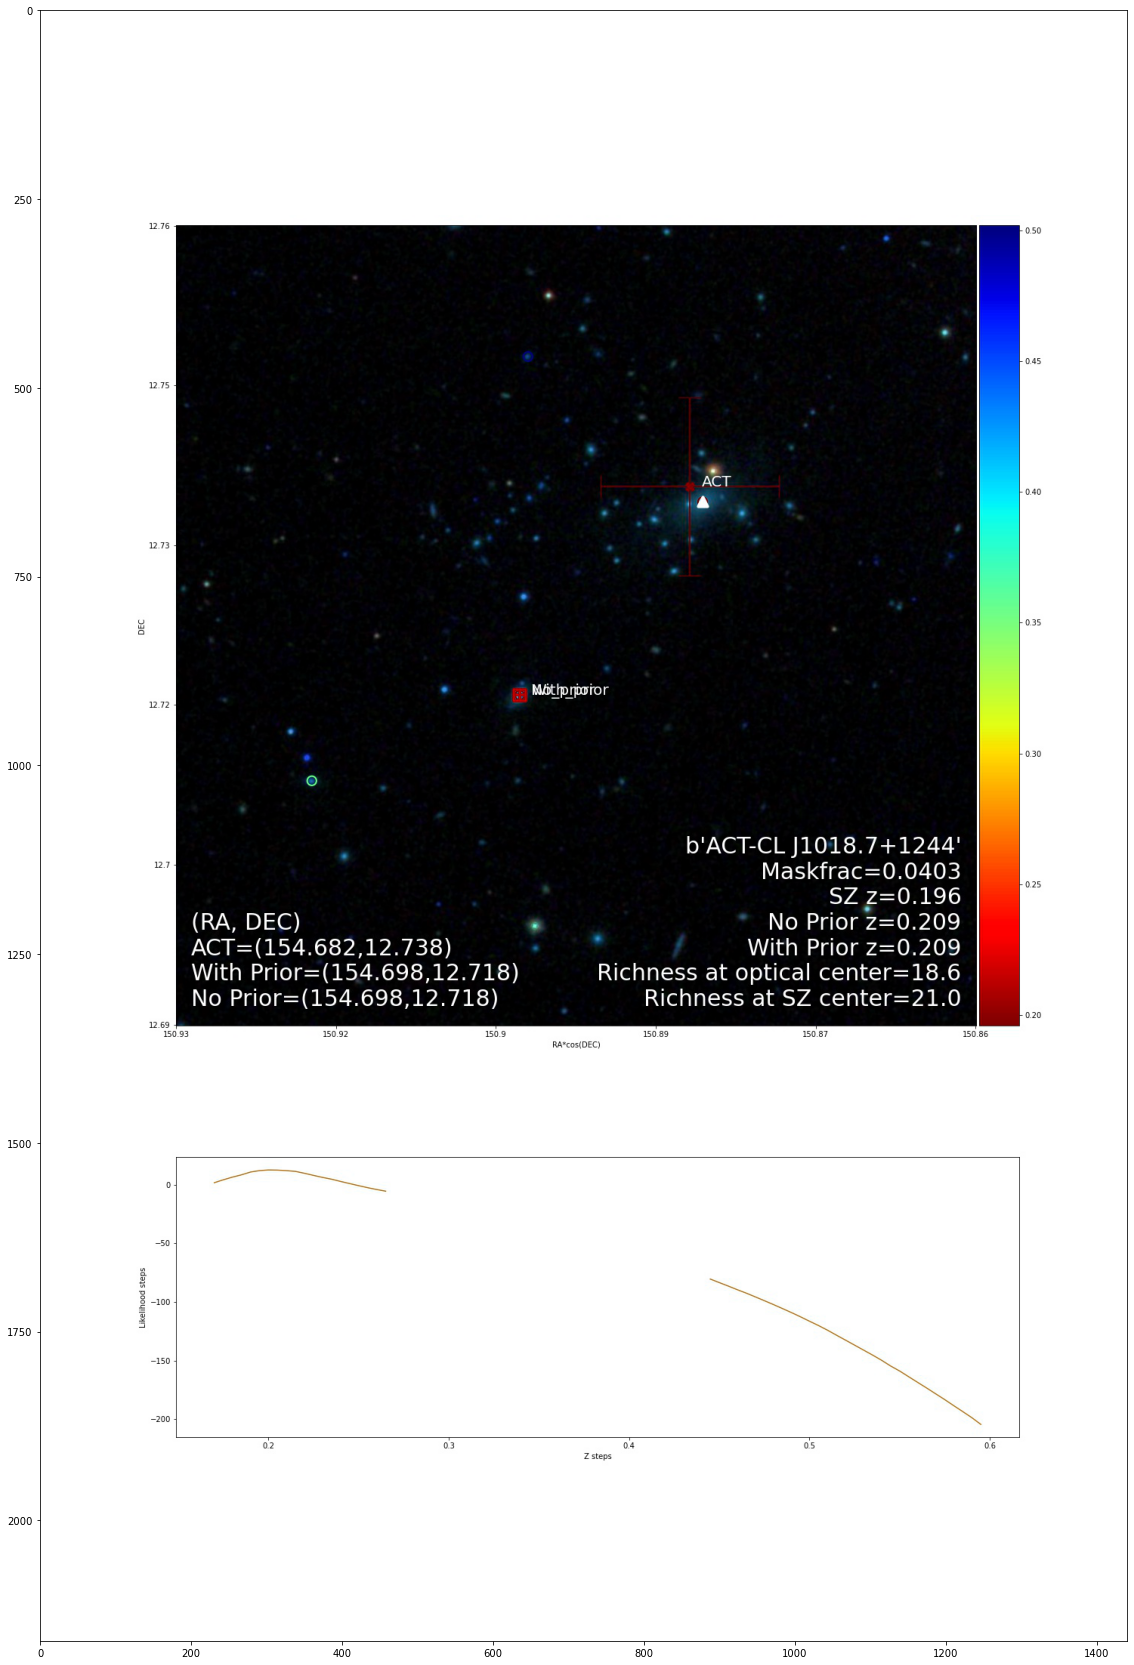

In [170]:
#This is the next cluster I'm looking at

image = cv2.imread('./skyimages/all_sorted_by_deltatheta93.jpg')
height, width, depth = image.shape
dpi = matplotlib.rcParams['figure.dpi']

figsize = width / float(dpi), height / float(dpi)

plt.figure(figsize=figsize)

plt.imshow(image)
plt.show()

In [171]:
#Searching for the RA,DEC of the nearby spectroscopic galaxy (white triangle)

ra, dec=154.6804, 12.736062

In [172]:
#Which pixel should this galaxy be in?
hp.ang2pix(32,ra,dec,lonlat=True)

4727

In [174]:
#load that pixel
pixel = fits.getdata("/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_0004727.fit")
pixel=pd.DataFrame.from_records(np.array(pixel).tolist(), columns=pixel.dtype.names)

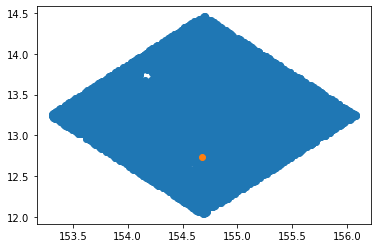

In [175]:
#Check that our ra, dec is inside this pixel. Blue dots are other galaxies, orange is our galaxy
plt.scatter(pixel.ra, pixel.dec)
plt.scatter(ra, dec)

In [176]:
#Find our galaxy in this list
np.where(np.isclose(pixel.ra,ra) & np.isclose(pixel.dec,dec))

(array([5804]),)

In [ ]:
#It's there

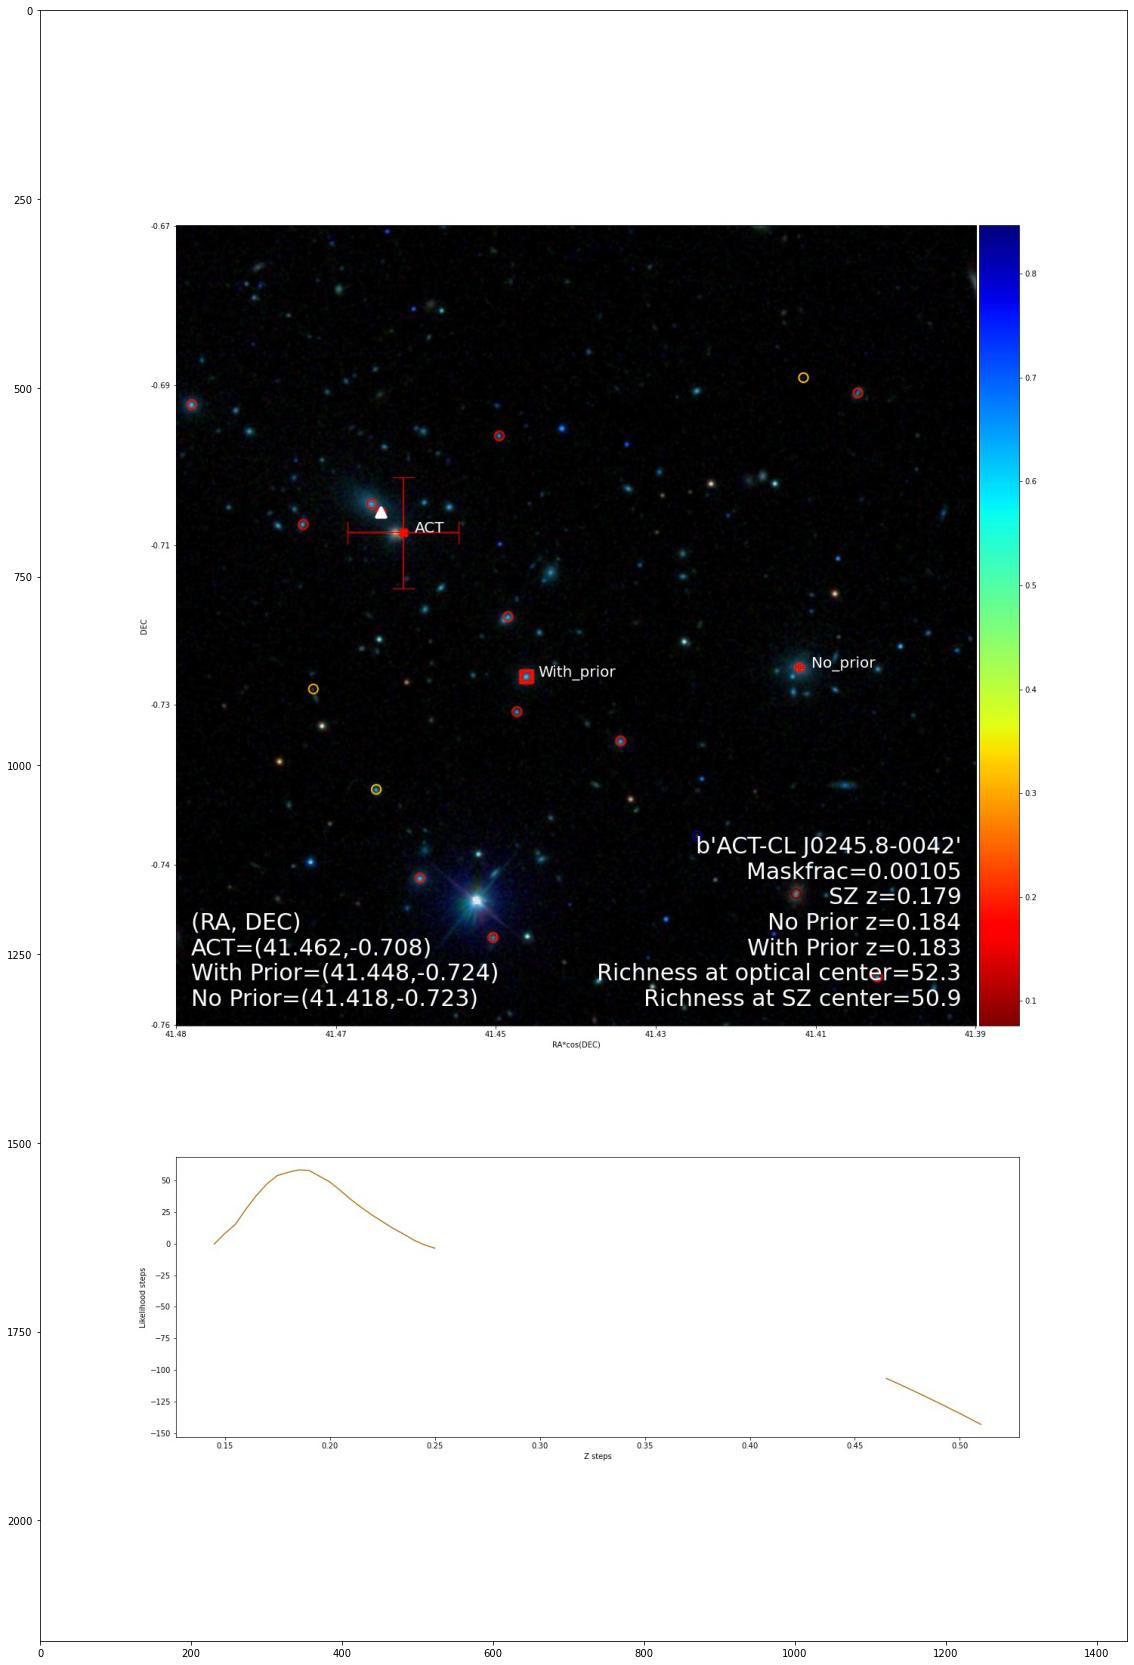

In [178]:
#This is the last cluster I'm looking at

image = cv2.imread('./skyimages/all_sorted_by_deltatheta63.jpg')
height, width, depth = image.shape
dpi = matplotlib.rcParams['figure.dpi']

figsize = width / float(dpi), height / float(dpi)

plt.figure(figsize=figsize)

plt.imshow(image)
plt.show()

In [179]:
#Searching for the RA,DEC of the nearby spectroscopic galaxy (just above and to left of white triangle)

ra,dec=41.473244,-0.70687201

In [180]:
#Which pixel should this galaxy be in?
hp.ang2pix(32,ra,dec,lonlat=True)

6223

In [181]:
#load that pixel
pixel = fits.getdata("/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_0006223.fit")
pixel=pd.DataFrame.from_records(np.array(pixel).tolist(), columns=pixel.dtype.names)

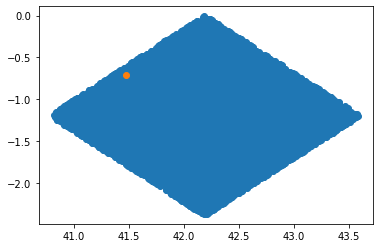

In [182]:
#Check that our ra, dec is inside this pixel. Blue dots are other galaxies, orange is our galaxy
plt.scatter(pixel.ra, pixel.dec)
plt.scatter(ra, dec)

In [183]:
#Find our galaxy in this list
np.where(np.isclose(pixel.ra,ra) & np.isclose(pixel.dec,dec))

(array([9436]),)

In [ ]:
#It's there